<a href="https://colab.research.google.com/github/helookscool/Machine_Learning_Machine_129/blob/main/%EC%A3%BC%EA%B8%B0%EC%A0%81%EC%9C%BC%EB%A1%9C_%EC%97%85%EB%8D%B0%EC%9D%B4%ED%8A%B8_%EB%90%98%EB%8A%94_%EC%A4%91%EA%B3%A0_%EC%9E%90%EB%8F%99%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 주기적으로 업데이트 되는 중고 자동차 데이터 분석

## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data


## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'ㅌㅌㅌ'
os.environ['KAGGLE_KEY'] = 'ㅌㅌㅌㅌㅌ'

### 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.* #이게 자동으로 업데이트되는 데이터기 때문에, 리눅스 명령어로 !rm *.* 해주면 나중에 파일을 다시 가동할때 자동으로 기존파일을 삭제하고 
#다시 다운 받아줌.
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

 98% 257M/262M [00:05<00:00, 70.7MB/s]
100% 262M/262M [00:05<00:00, 52.3MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('vehicles.csv') #이게 용량이 꽤 많아서;; 위의 RAM을 존나 잡아먹음. 여러번 run하지마삼; 

## Step 2. EDA 및 데이터 기초 통계 분석


### 4. 불필요한 데이터 데이터프레임에서 제거하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [9]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [11]:
df.drop([ 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date','county'], axis=1, inplace=True)

In [12]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True) 

In [13]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,2.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,1.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,1.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,3.0


### 5. 범주형 데이터의 통계 분석하기


In [14]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [15]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기
# manufacturer 부터 함 봐볼까.
len(df['manufacturer'].value_counts())

42

In [16]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


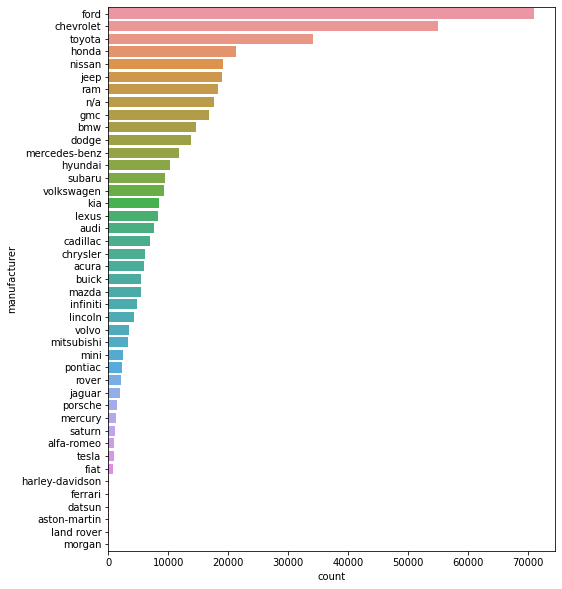

In [17]:
# countplot으로 얘들 분포를 좀 봐볼까?
#df.fillna('n/a')로 채워서 결측치인 것들의 수도 좀 봐보자. N/A수를 따로 추산하지 않아도 n/a가 카테고리중 하나로 들어가게 됨.
#['manufacturer'].value_counts().index 는 인덱스를 ['manufacturer'].value_counts()로 해서 ['manufacturer'].value_counts()이거 순서로 그래프 그리라는 뜻임.
fig = plt.figure(figsize=(8, 10))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [18]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [19]:
len(df['model'].value_counts()) #너무 많아서 그래프로 보기 힘들고, 내용을 보기도 힘들다. 

29667

In [20]:
#그래도 굳이 보자면, for문 돌려서 모델명이랑 갯수랑 해서 봐보자.
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)
#일단 쓱 봐보면, 갯수가 1개인 차량중에는 대소문자가 달라서 모델이 달라지는 경우나, 모델명이 대충써진거나, 잘못써진거나 이런게 좀 있는거 같다. 
#얘는 메모리 문제가 있어서 그래프 못돌림. 돌리면 메모리 바닥남.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
cooper clubman base 3dr 1
silverado 2500 hd 3/4 ton 1
sho 1
940 wagon 1
f-350 4x 4 utility 1
pick up truck 1
5 series 535i xdrive 4dr s 1
Suzuki SFV650 1
Mack Granite GU713 1
Dune buddy 1
2010 f250 super duty 1
four door 1
1500 laramie big horn 1
jetta 4dr man 2.0l s 1
2016 Mazada Miata 1
silverado durmax 1500 1
silverado ext cab 4wd 1
sorento sxl awd 1
2006 saab 92x 1
2500 slt quad cab 1
trailblazer ls ** only 76k miles ** 4x4 vortec 4.2l 285hp 1
1941 1
benz 2500 high roof 1
Meercedes 1
envoy sle sport utility 4d 1
328it 1
91 Bentley Turbo R 1
commander overland 1
UD 2600 1
golf tdi 2.0l 1
f150 lariat crewcab 4x4 1
1972 oldsmobile delta 88 royale 1
Comet 2 door sedan 1
E350 4500 3500 Savana Express 1
mazda6i 1
tundra 4x4 2016 1
2c4rc1cg0cr181348 1
350z roadster touring 1
sierra z71 4x4 1
jetta gls 1.8t 1
Expedición 1
tdi jetta sportwagen golf 1
escape se 4dr suv 1
fusiom 1
nv 200 sv 1
xe 35t r-sport awd 1
Suzuki XL-7 Luxury 1
pickup 1500 classic lon

스크래핑으로 긁어온 데이타는 시각적으로 일일히 내용을 다 봐두는게 좋다... 어디서 어떻게 엉망인 데이터가 나올지 모르므로;;;

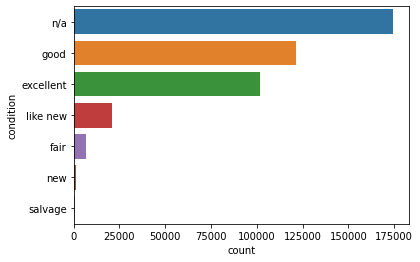

In [21]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

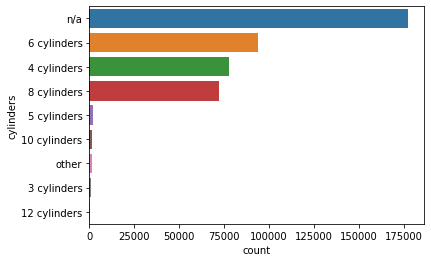

In [22]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

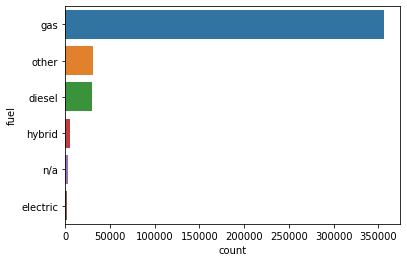

In [23]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

In [24]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

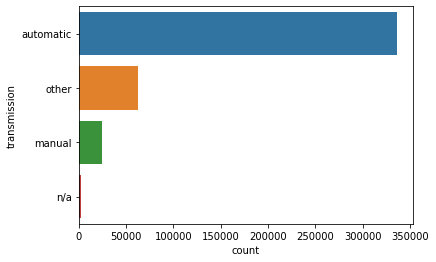

In [25]:
sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

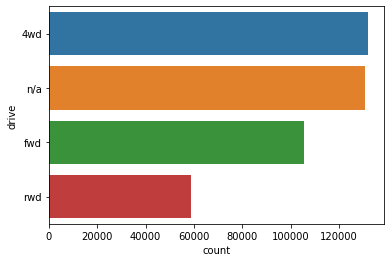

In [26]:
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

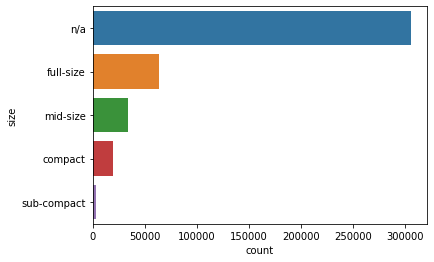

In [27]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

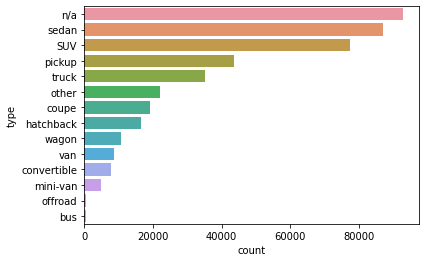

In [28]:
sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

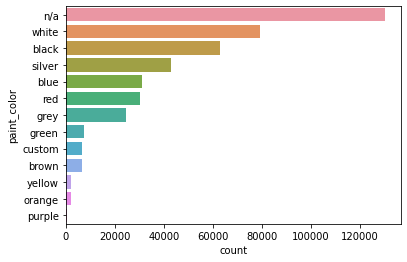

In [29]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

### 6. 수치형 데이터의 통계 분석하기

In [30]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

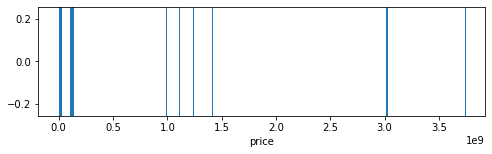

In [31]:
#Price가 histoplot으로 그릴려했더니 메모리 터짐.... 간단하게 lugplot으로 보고, 워낙 이상치가 크므로 height=1로 줘서 본다.
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

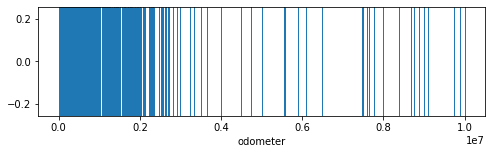

In [32]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

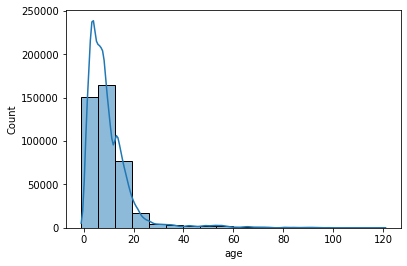

In [33]:
sns.histplot(x='age', data=df, bins=18, kde=True) #5~10년 정도가 가장 많음.

## Step 3. 데이터 클리닝 수행하기

### 7. 범주형 데이터 시각화하여 분석하기
--> 범주형 데이터별로 price와의 연관성을 봐보자....

In [34]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

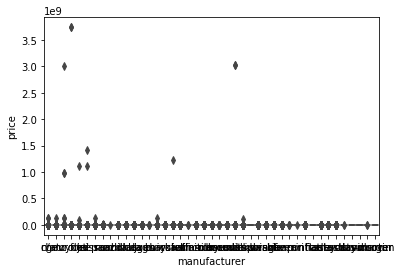

In [35]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))
#도저히 분석이 안되므로, 데이터를 한번 클리닝 한다음에 접근하도록하자. 

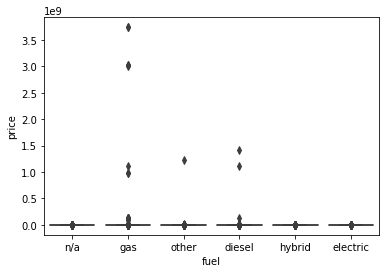

In [36]:
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

### 8. 범주형 데이터 클리닝하기

In [37]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [38]:
# 범주형 데이터는 아래 방법 중 적절히 판단하여 처리할수 있음.
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# 4. Classifier를 학습해서, 결손데이터를 추정하여 채워넣기. 
df.drop('title_status', axis=1, inplace=True)

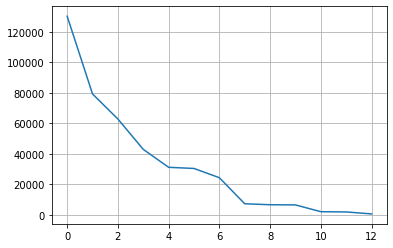

In [39]:
#저 컬럼들을 일일히 다 손보는건 좀 짜증나니까, 좀 자동으로 다듬어 지게 만들어 보자. 일단 결측값을 'others'로 채워넣음. 결측치도 하나의 피쳐로 보겠음.
#너무 많으니까;
#일단 paint_color 봐본다. 
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [40]:
counts.index #카테고리가 너무 많으니까, 한 7개까지만 보고 그 외것들은 다 others로 치부해 버리자. (차원의 저주)

Index(['others', 'white', 'black', 'silver', 'blue', 'red', 'grey', 'green',
       'custom', 'brown', 'yellow', 'orange', 'purple'],
      dtype='object')

In [41]:
n_categorical = 7
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
#람다 s가 counts.index[n_categorical:]에 속하면 s그대로 쓰고, 아니면 others로 쓴다

In [42]:
df[col].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
others    25449
grey      24416
Name: paint_color, dtype: int64

In [43]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

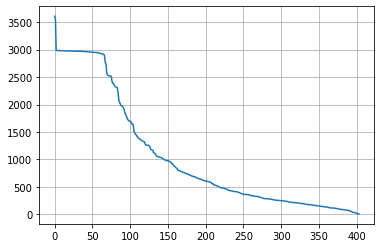

In [44]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [45]:
n_categorical = 5
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

others                     410754
columbus                     3608
jacksonville                 3562
spokane / coeur d'alene      2988
eugene                       2985
orlando                      2983
Name: region, dtype: int64

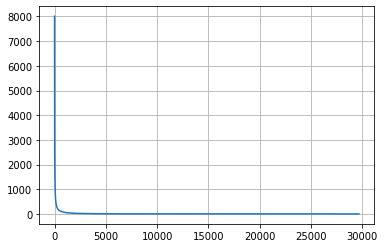

In [46]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)
#얘는 좀 극단적이네....카테고리가 너무 많으니 상위 20개만 좀 봐보자. 

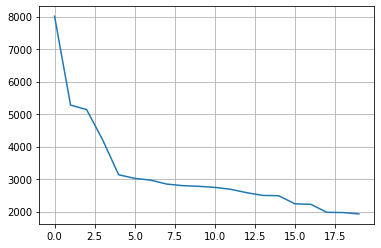

In [47]:
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])
#10개 이상은 다 others해도 되겠네.

In [48]:
n_categorical = 5
#df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others') 이렇게 람다수식을 작성해버리면
#코드를 읽을 때마다 3만개의 카테고리 리스트를 람다가 호출될떄마다 새로 만들어버림. 그래서 속도 개선을 위해 리스트를 미리 만들어주는데
#그 역할을 하는게 이거임 --> others = counts.index[n_categorical:]
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

others            401108
f-150               8009
silverado 1500      5140
1500                4211
camry               3135
Name: model, dtype: int64

In [49]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

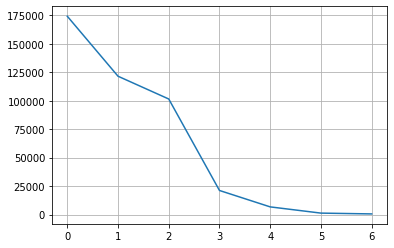

In [50]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [51]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

good         121456
excellent    101467
others        29853
Name: condition, dtype: int64

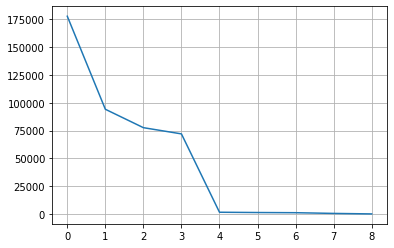

In [52]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [53]:
n_categorical = 4
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

6 cylinders    94169
4 cylinders    77642
8 cylinders    72062
others          5329
Name: cylinders, dtype: int64

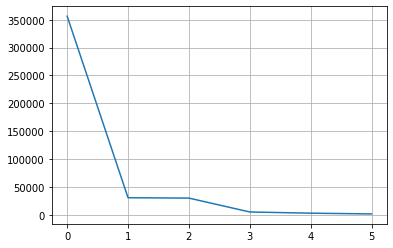

In [54]:
#'fuel', 'odometer', 'transmission', 'drive', 'size', 'type','paint_color', 'county', 'age'],
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [55]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

gas       356209
other      30728
diesel     30062
others      6868
Name: fuel, dtype: int64

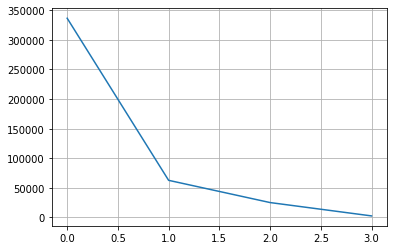

In [56]:
#'fuel', 'odometer', 'transmission', 'drive', 'size', 'type','paint_color', 'county', 'age'],
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [57]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

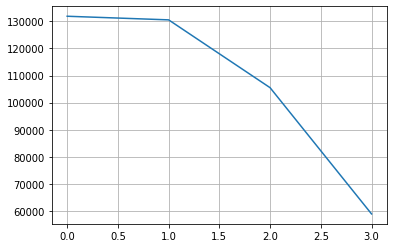

In [58]:
#'fuel', 'odometer', 'transmission', 'drive', 'size', 'type','paint_color', 'county', 'age'],
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)
#얘는 3도 숫자가 좀 되네. 그대로 둔다.

In [59]:
df[col].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

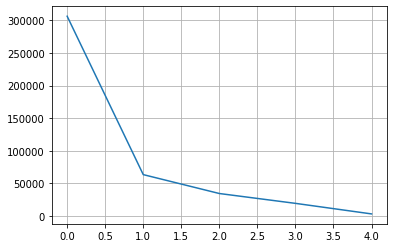

In [60]:
#'fuel', 'odometer', 'transmission', 'drive', 'size', 'type','paint_color', 'county', 'age'],
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)
#얘는 3도 숫자가 좀 되네. 그대로 둔다.

In [61]:
n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

full-size    63465
others       57054
Name: size, dtype: int64

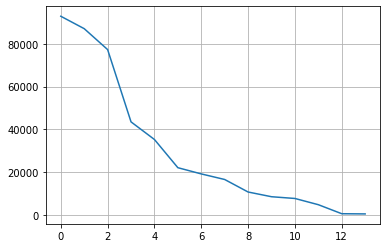

In [62]:
#'fuel', 'odometer', 'transmission', 'drive', 'size', 'type','paint_color', 'county', 'age'],
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [63]:
n_categorical = 8
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

sedan        87056
SUV          77284
pickup       43510
truck        35279
others       32981
other        22110
coupe        19204
hatchback    16598
Name: type, dtype: int64

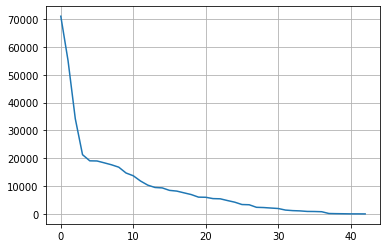

In [64]:
col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [65]:
n_categorical = 10
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

others       139807
ford          70985
chevrolet     55064
toyota        34202
honda         21269
nissan        19067
jeep          19014
ram           18342
gmc           16785
bmw           14699
Name: manufacturer, dtype: int64

In [66]:
df.loc[df[col] == 'other', col] = 'others'#'other'랑 'others'는 합쳐주도록 할까.

In [67]:
df[col].fillna('others', inplace=True)

### 9. 수치형 데이터 클리닝하기

In [68]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기
# 이상치제거를 위해 상위 1%와 하위 10%를 버림. 일일히 %숫자 넣어가면서 찾으삼.
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.1)
print(p1, p2)

66995.0 500.0


In [69]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [70]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

280000.0 15812.0


In [71]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [72]:
df.describe()
#평균값이랑 중앙값이 비슷해지면 가우시안에 가까워 지는 거임. 값이 좀 비슷해 보이므로 어느정도는 합리적이게 잘랐다라고 볼수 있음....
#age....는 골동품 팔수도 있으니;;일단 놔둬보자.

,price,odometer,age
count,335851.000000,335851.000000,335248.000000
mean,17534.838914,101335.798690,10.239056
std,12645.528274,56884.388094,8.469817
min,501.000000,15813.000000,-1.000000
25%,7425.500000,53000.000000,5.000000
50%,14500.000000,96936.000000,8.000000
75%,25226.500000,140337.000000,13.000000
max,66992.000000,279974.000000,121.000000


### 10. 수치형 데이터 시각화하여 분석하기

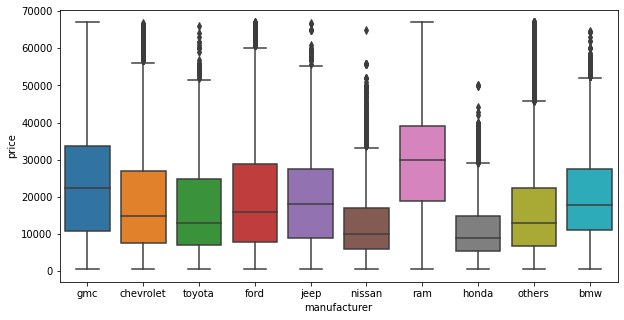

In [73]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df)
#근데 manufacturer는 범주형 데이터 잖음 ㅡㅡ??

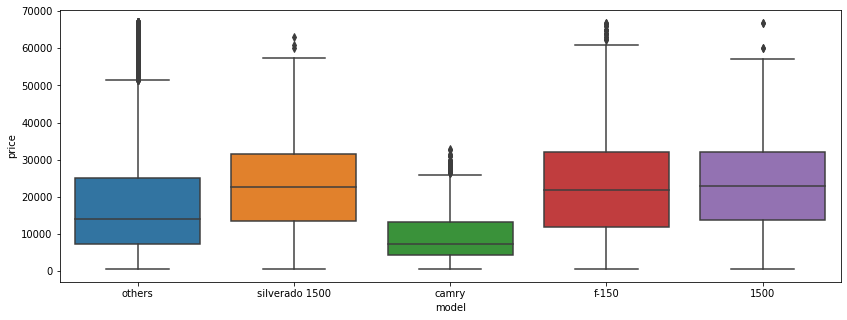

In [74]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='model', y='price', data=df)

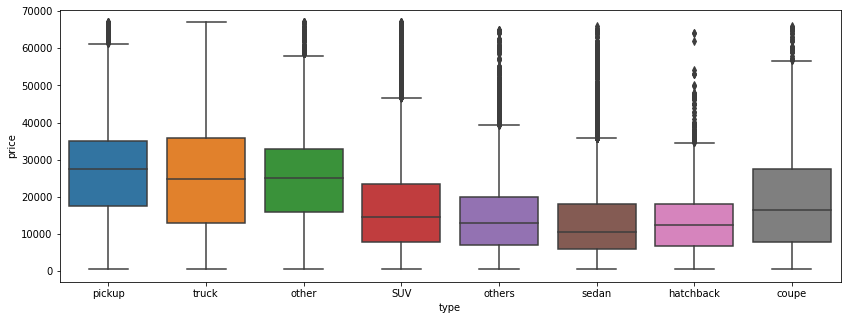

In [75]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='type', y='price', data=df)

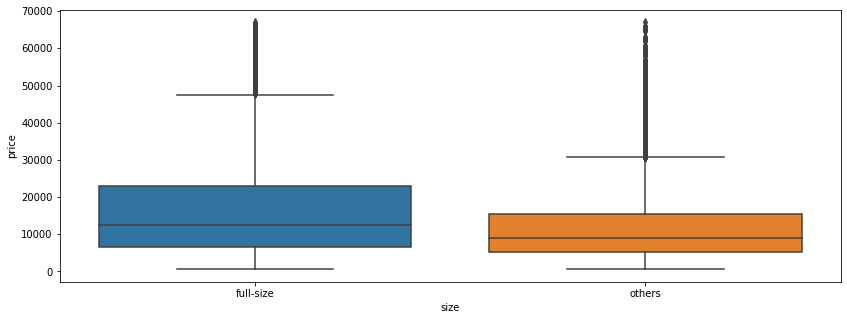

In [76]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='size', y='price', data=df)

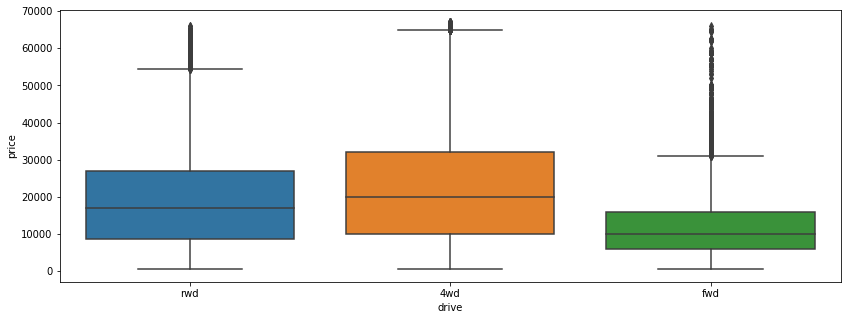

In [77]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='drive', y='price', data=df)

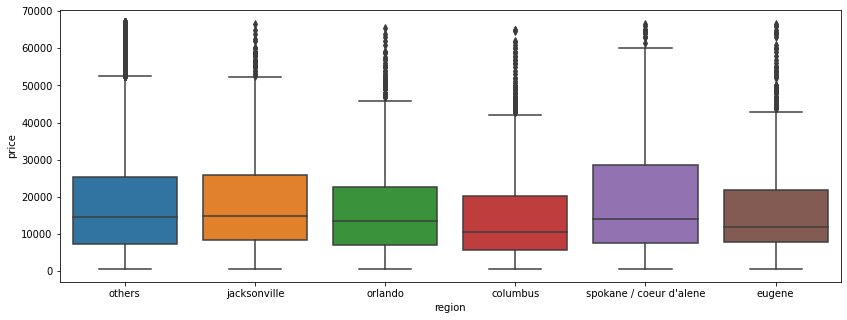

In [78]:
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='region', y='price', data=df)

### 11. 컬럼간의 Correlation Heatmap으로 시각화하기

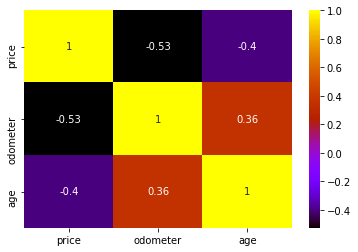

In [79]:
sns.heatmap(df.corr(), annot=True, cmap='gnuplot')# 컨츄리....는 어떻게 해석해야되냐...ㅡㅡ.
#annot=True 하면 절대값 보여줌...

## Step 4. 모델 학습을 위한 데이터 전처리 

### 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기

X_num = df[['odometer', 'age']] #country는 정체를 몰라서 뺐음...

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)#꼭 데이터프레임 재구성해줘야 나중에 실수안함!!

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)

X_cat = pd.get_dummies(X_cat)

# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [82]:
X.head()

,odometer,age,region_columbus,region_eugene,region_jacksonville,region_orlando,region_others,region_spokane / coeur d'alene,manufacturer_bmw,manufacturer_chevrolet,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_1500,model_camry,model_f-150,model_others,model_silverado 1500,condition_excellent,condition_good,condition_others,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_other,fuel_others,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_full-size,size_others,type_SUV,type_coupe,type_hatchback,type_other,type_others,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
27,-0.763177,-0.382424,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
28,-0.529264,0.089842,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
29,-1.444613,-1.090823,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
30,-1.058496,-0.736623,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
31,0.468744,-0.264357,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [83]:
X.shape

(335851, 57)

In [84]:
X.isna().sum()

odometer                            0
age                               603
region_columbus                     0
region_eugene                       0
region_jacksonville                 0
region_orlando                      0
region_others                       0
region_spokane / coeur d'alene      0
manufacturer_bmw                    0
manufacturer_chevrolet              0
manufacturer_ford                   0
manufacturer_gmc                    0
manufacturer_honda                  0
manufacturer_jeep                   0
manufacturer_nissan                 0
manufacturer_others                 0
manufacturer_ram                    0
manufacturer_toyota                 0
model_1500                          0
model_camry                         0
model_f-150                         0
model_others                        0
model_silverado 1500                0
condition_excellent                 0
condition_good                      0
condition_others                    0
cylinders_4 

In [86]:
#age가 평균이 0에 가까우므로...그냥 0줬음.
X.fillna(0.0, inplace=True)

### 13. 학습데이터와 테스트데이터 분리하기


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 5. Regression 모델 학습하기

### 14. XGBoost Regression 모델 학습하기

In [89]:
from xgboost import XGBRegressor

In [90]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[14:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 15. 모델 학습 결과 평가하기

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [92]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
#에러값 존나큼 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

4465.672847081605
6626.794520704104


## Step 6. 모델 학습 결과 심화 분석하기


### 16. 실제 값과 추측 값의 Scatter plot 시각화하기


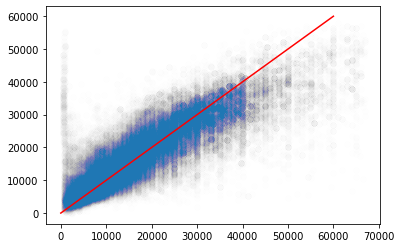

In [93]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용
plt.scatter(x=y_test, y=pred, alpha=0.005)#alpha값을 좀 많이 줄여서 특히 뭉쳐진 부분이 잘 드러나게 만들엇음,
plt.plot([0,60000], [0,60000], 'r-')
#보면 값이 비싼 차들은 좀 과소평가하는 경향이 있고, 또 실제로는 값이 비싼 차인데 0원으로 봐버리는 경우가 꽤 있음.

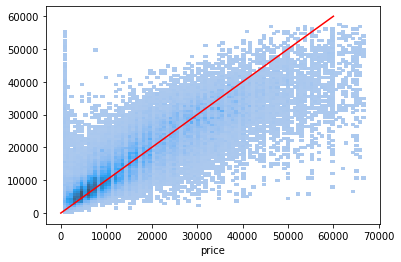

In [94]:
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60000], [0, 60000], 'r-')

### 17. 에러 값의 히스토그램 확인하기


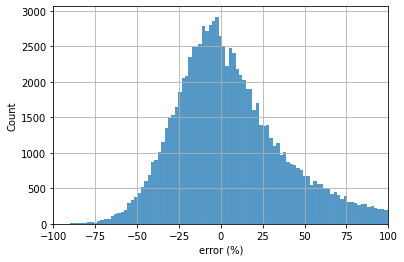

In [95]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)#-100에서 100사이만 잘라서 본거임.
plt.grid()
#0기준으로 봤을때 음수쪽으로 좀 치우쳐져 있으니 값을 과소평가하고있음. 그리고 양수쪽은 꼬리가 두꺼운거 보니 에러율이 꽤 높음.

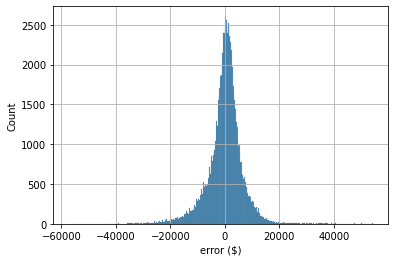

In [97]:
err = (pred - y_test)#이건 %아니고 절대값으로만 볼때임.
sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()